# Aprendizaje supervisado - Árboles de decisión
Los árboles de decisión, como todo algoritmo de aprendizaje automático supervisado, tienen como función la de predecir la variable respuesta en función de las covariables. Observe que estas covariables son el equivalente de las variables predictoras o variables independientes en las regresiones lineales o logísticas.

### Concepto de árboles de decisión
El aprendizaje por intermedio de árboles es, quizás, una de las técnicas más utilizadas para el aprendizaje inductivo, presenta una gran robustez ante datos con ruido (atípicos). Por lo general, las covariables y las variable respuesta son de tipo categórico pero se pueden presentar árboles con datos numéricos. El árbol se construyen basados en una serie de condiciones que pueden posteriormente mapearse a reglas de clasificación.

Cuando se tiene una instancia nueva para clasificar, esta instancia se compara con las diferentes ramas y condiciones, que van del nodo raíz a las ramas, generadas en el árbol para poder lograr su clasificación.

<p align="center">
<img src="arbold.jpg" width="600">
</p>

La figura anterior muestra un árbol de decisión muy simple con una covariable numérica (IMC) y otra categórica dicotómica (Antecedentes obesidad Si/No), y una clase con dos valores: "Llevar una vida sana" y "Hacer ejercicio. El nodo raíz es aque que determina el algoritmo que tiene mayor ganancia de información.

### Tipos de árboles
Dependiendo del tipo de variable de respuesta o etiqueta, los árboles pueden ser de dos tipos:

* **Árboles de regresión:** son aquellos donde la variable respuesta y es cuantitativa.
* **Árboles de clasificación:** son aquellos donde la variable respuesta y es cualitativa.

#### Árboles de regresión
![Arbol de regresión](ilustracion_arb_regresion.png)

Los árboles de regresión desarrollan varias particiones para las covariables comparando estas con puntos de corte que permiten dividir las instancias en hiper-rectángulos que agrupan en cada uno las predicciones $\hat{y}$.

Para desarrollar un árbol de regresión se deben seguir los siguientes pasos generales:

1. Encontrar la covariable que permita predecir mejor la variable respuesta.
2. Encontrar el mejor punto de corte $c$ para esta predicción.
3. Repetir hasta tener todas las instancias clasificadas o que se alcance un criterio de parada que por lo general es minimizar la función de costos $\sum_{i=1}^m(y_{i}-\hat{y_{i}})^2$

## Carga del conjunto de datos

In [1]:
# Importar modulos necesarios para el tratamiendo de datos e imágenes
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# Leer el dataset
url = 'https://raw.githubusercontent.com/JASDataCTG/Diplomado-ML/main/Modulo%203/Datasets/Movie_regressiones.csv'
df = pd.read_csv(url, header = 0)

In [3]:
df.head()

Costo de marketing  Costo de produccion  Multiplex cubiertos  Ganancias  \
0             20.1264                59.62                0.462  36524.125   
1             20.5462                69.14                0.531  35668.655   
2             20.5458                69.14                0.531  39912.675   
3             20.6474                59.36                0.542  38873.890   
4             21.3810                59.36                0.542  39701.585   

   Duracion pelicula  Rating actor principal  Rating actriz principal  \
0              138.7                   7.825                    8.095   
1              152.4                   7.505                    7.650   
2              134.6                   7.485                    7.570   
3              119.3                   6.895                    7.035   
4              127.7                   6.920                    7.070   

   Rating director  Rating del productor  Ratig criticos  \
0            7.910                 7.995            7.94   
1            7.440                 7.470            7.44   
2            7.495                 7.515            7.44   
3            6.920                 7.020            8.26   
4            6.815                 7.070            8.26   

   Visualizaciones trailer Disponibilidad en 3D  Tiempo realizacion  \
0                   527367                   SI              109.60   
1                   494055                   NO              146.64   
2                   547051                   NO              147.88   
3                   516279                   SI              185.36   
4                   531448                   NO              176.48   

   Hashtags Twitter   Genero  Promedio edad actores  Numero multiplex  \
0           223.840   Terror                     23               494   
1           243.456    Drama                     42               462   
2          2022.400  Comedia                     38               458   
3           225.344    Drama                     45               472   
4           225.792    Drama                     55               395   

   Coleccion  
0      48000  
1      43200  
2      69400  
3      66800  
4      72400

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 18 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Costo de marketing       506 non-null    float64
 1   Costo de produccion      506 non-null    float64
 2   Multiplex cubiertos      506 non-null    float64
 3   Ganancias                506 non-null    float64
 4   Duracion pelicula        506 non-null    float64
 5   Rating actor principal   506 non-null    float64
 6   Rating actriz principal  506 non-null    float64
 7   Rating director          506 non-null    float64
 8   Rating del productor     506 non-null    float64
 9   Ratig criticos           506 non-null    float64
 10  Visualizaciones trailer  506 non-null    int64  
 11  Disponibilidad en 3D     506 non-null    object 
 12  Tiempo realizacion       494 non-null    float64
 13  Hashtags Twitter         506 non-null    float64
 14  Genero                   5

### Imputación de valores faltantes

In [5]:
# Imputar los valores faltantes por la media de los valores presentes
df['Tiempo realizacion'].mean()

157.3914979757085

In [6]:
# Imputar los valores sin crear un nuevo objeto (inplace = True)
df['Tiempo realizacion'].fillna(value = df['Tiempo realizacion'].mean(), inplace = True)

In [7]:
df.head()

Costo de marketing  Costo de produccion  Multiplex cubiertos  Ganancias  \
0             20.1264                59.62                0.462  36524.125   
1             20.5462                69.14                0.531  35668.655   
2             20.5458                69.14                0.531  39912.675   
3             20.6474                59.36                0.542  38873.890   
4             21.3810                59.36                0.542  39701.585   

   Duracion pelicula  Rating actor principal  Rating actriz principal  \
0              138.7                   7.825                    8.095   
1              152.4                   7.505                    7.650   
2              134.6                   7.485                    7.570   
3              119.3                   6.895                    7.035   
4              127.7                   6.920                    7.070   

   Rating director  Rating del productor  Ratig criticos  \
0            7.910                 7.995            7.94   
1            7.440                 7.470            7.44   
2            7.495                 7.515            7.44   
3            6.920                 7.020            8.26   
4            6.815                 7.070            8.26   

   Visualizaciones trailer Disponibilidad en 3D  Tiempo realizacion  \
0                   527367                   SI              109.60   
1                   494055                   NO              146.64   
2                   547051                   NO              147.88   
3                   516279                   SI              185.36   
4                   531448                   NO              176.48   

   Hashtags Twitter   Genero  Promedio edad actores  Numero multiplex  \
0           223.840   Terror                     23               494   
1           243.456    Drama                     42               462   
2          2022.400  Comedia                     38               458   
3           225.344    Drama                     45               472   
4           225.792    Drama                     55               395   

   Coleccion  
0      48000  
1      43200  
2      69400  
3      66800  
4      72400

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 18 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Costo de marketing       506 non-null    float64
 1   Costo de produccion      506 non-null    float64
 2   Multiplex cubiertos      506 non-null    float64
 3   Ganancias                506 non-null    float64
 4   Duracion pelicula        506 non-null    float64
 5   Rating actor principal   506 non-null    float64
 6   Rating actriz principal  506 non-null    float64
 7   Rating director          506 non-null    float64
 8   Rating del productor     506 non-null    float64
 9   Ratig criticos           506 non-null    float64
 10  Visualizaciones trailer  506 non-null    int64  
 11  Disponibilidad en 3D     506 non-null    object 
 12  Tiempo realizacion       506 non-null    float64
 13  Hashtags Twitter         506 non-null    float64
 14  Genero                   5

In [9]:
df.describe()

Costo de marketing  Costo de produccion  Multiplex cubiertos  \
count          506.000000           506.000000           506.000000   
mean            92.270471            77.273557             0.445305   
std            172.030902            13.720706             0.115878   
min             20.126400            55.920000             0.129000   
25%             21.640900            65.380000             0.376000   
50%             25.130200            74.380000             0.462000   
75%             93.541650            91.200000             0.551000   
max           1799.524000           110.480000             0.615000   

          Ganancias  Duracion pelicula  Rating actor principal  \
count    506.000000         506.000000              506.000000   
mean   34911.144022         142.074901                8.014002   
std     3903.038232          28.148861                1.054266   
min    19781.355000          76.400000                3.840000   
25%    32693.952500         118.525000                7.316250   
50%    34488.217500         151.000000                8.307500   
75%    36793.542500         167.575000                8.865000   
max    48772.900000         173.500000                9.435000   

       Rating actriz principal  Rating director  Rating del productor  \
count               506.000000       506.000000            506.000000   
mean                  8.185613         8.019664              8.190514   
std                   1.054290         1.059899              1.049601   
min                   4.035000         3.840000              4.030000   
25%                   7.503750         7.296250              7.507500   
50%                   8.495000         8.312500              8.465000   
75%                   9.030000         8.883750              9.030000   
max                   9.540000         9.425000              9.635000   

       Ratig criticos  Visualizaciones trailer  Tiempo realizacion  \
count      506.000000               506.000000          506.000000   
mean         7.810870            449860.715415          157.391498   
std          0.659699             68917.763145           30.921101   
min          6.600000            212912.000000            0.000000   
25%          7.200000            409128.000000          132.690000   
50%          7.960000            462460.000000          158.980000   
75%          8.260000            500247.500000          181.520000   
max          9.400000            567784.000000          217.520000   

       Hashtags Twitter  Promedio edad actores  Numero multiplex  \
count        506.000000             506.000000        506.000000   
mean         260.832095              39.181818        545.043478   
std          104.779133              12.513697        106.332889   
min          201.152000               3.000000        333.000000   
25%          223.796000              28.000000        465.000000   
50%          254.400000              39.000000        535.500000   
75%          283.416000              50.000000        614.750000   
max         2022.400000              60.000000        868.000000   

           Coleccion  
count     506.000000  
mean    45057.707510  
std     18364.351764  
min     10000.000000  
25%     34050.000000  
50%     42400.000000  
75%     50000.000000  
max    100000.000000

### Creación de variables dummy

In [10]:
# Revisar los valores únicos en al serie conformada por la columna Genero
list(dict.fromkeys(df['Genero']))

['Terror', 'Drama', 'Comedia', 'Accion']

In [11]:
# Crear las variables dummy eliminando una de ellas y eliminando igualmente la columna que las origina
df = pd.get_dummies(df, columns = ['Disponibilidad en 3D', 'Genero'], drop_first = True)

In [12]:
df.head()

Costo de marketing  Costo de produccion  Multiplex cubiertos  Ganancias  \
0             20.1264                59.62                0.462  36524.125   
1             20.5462                69.14                0.531  35668.655   
2             20.5458                69.14                0.531  39912.675   
3             20.6474                59.36                0.542  38873.890   
4             21.3810                59.36                0.542  39701.585   

   Duracion pelicula  Rating actor principal  Rating actriz principal  \
0              138.7                   7.825                    8.095   
1              152.4                   7.505                    7.650   
2              134.6                   7.485                    7.570   
3              119.3                   6.895                    7.035   
4              127.7                   6.920                    7.070   

   Rating director  Rating del productor  Ratig criticos  \
0            7.910                 7.995            7.94   
1            7.440                 7.470            7.44   
2            7.495                 7.515            7.44   
3            6.920                 7.020            8.26   
4            6.815                 7.070            8.26   

   Visualizaciones trailer  Tiempo realizacion  Hashtags Twitter  \
0                   527367              109.60           223.840   
1                   494055              146.64           243.456   
2                   547051              147.88          2022.400   
3                   516279              185.36           225.344   
4                   531448              176.48           225.792   

   Promedio edad actores  Numero multiplex  Coleccion  \
0                     23               494      48000   
1                     42               462      43200   
2                     38               458      69400   
3                     45               472      66800   
4                     55               395      72400   

   Disponibilidad en 3D_SI  Genero_Comedia  Genero_Drama  Genero_Terror  
0                        1               0             0              1  
1                        0               0             1              0  
2                        0               1             0              0  
3                        1               0             1              0  
4                        0               0             1              0

### División de la variable predicha y el vector de características

In [13]:
# Asignar a X el array de atributos a excepción del atributo Coleccion
X = df.loc[:, df.columns!= 'Coleccion']

In [14]:
X.head()

Costo de marketing  Costo de produccion  Multiplex cubiertos  Ganancias  \
0             20.1264                59.62                0.462  36524.125   
1             20.5462                69.14                0.531  35668.655   
2             20.5458                69.14                0.531  39912.675   
3             20.6474                59.36                0.542  38873.890   
4             21.3810                59.36                0.542  39701.585   

   Duracion pelicula  Rating actor principal  Rating actriz principal  \
0              138.7                   7.825                    8.095   
1              152.4                   7.505                    7.650   
2              134.6                   7.485                    7.570   
3              119.3                   6.895                    7.035   
4              127.7                   6.920                    7.070   

   Rating director  Rating del productor  Ratig criticos  \
0            7.910                 7.995            7.94   
1            7.440                 7.470            7.44   
2            7.495                 7.515            7.44   
3            6.920                 7.020            8.26   
4            6.815                 7.070            8.26   

   Visualizaciones trailer  Tiempo realizacion  Hashtags Twitter  \
0                   527367              109.60           223.840   
1                   494055              146.64           243.456   
2                   547051              147.88          2022.400   
3                   516279              185.36           225.344   
4                   531448              176.48           225.792   

   Promedio edad actores  Numero multiplex  Disponibilidad en 3D_SI  \
0                     23               494                        1   
1                     42               462                        0   
2                     38               458                        0   
3                     45               472                        1   
4                     55               395                        0   

   Genero_Comedia  Genero_Drama  Genero_Terror  
0               0             0              1  
1               0             1              0  
2               1             0              0  
3               0             1              0  
4               0             1              0

In [15]:
X.shape

(506, 19)

In [16]:
y = df['Coleccion']
type(y)

pandas.core.series.Series

In [17]:
y.head()

0    48000
1    43200
2    69400
3    66800
4    72400
Name: Coleccion, dtype: int64

In [18]:
y.shape

(506,)

### Creación del conjunto de entrenamiento y validación

In [19]:
# Importar los modulos necesarios para dividir el dataset
from sklearn.model_selection import train_test_split

In [20]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [21]:
X_train.head()

Costo de marketing  Costo de produccion  Multiplex cubiertos  Ganancias  \
220             27.1618                67.40                0.493  38612.805   
71              23.1752                76.62                0.587  33113.355   
240             22.2658                64.86                0.572  38312.835   
6               21.7658                70.74                0.476  33396.660   
417            538.8120                91.20                0.321  29463.720   

     Duracion pelicula  Rating actor principal  Rating actriz principal  \
220              162.0                   8.485                    8.640   
71                91.0                   7.280                    7.400   
240              127.8                   6.755                    6.935   
6                140.1                   7.065                    7.265   
417              162.6                   9.135                    9.305   

     Rating director  Rating del productor  Ratig criticos  \
220            8.485                 8.670            8.52   
71             7.290                 7.455            8.16   
240            6.800                 6.840            8.68   
6              7.150                 7.400            8.96   
417            9.095                 9.165            6.96   

     Visualizaciones trailer  Tiempo realizacion  Hashtags Twitter  \
220                   480270              174.68           224.272   
71                    491978              200.68           263.472   
240                   470107              204.80           224.320   
6                     459241              139.16           243.664   
417                   302776              172.16           301.664   

     Promedio edad actores  Numero multiplex  Disponibilidad en 3D_SI  \
220                     23               536                        0   
71                      46               400                        0   
240                     24               387                        1   
6                       41               522                        1   
417                     60               589                        1   

     Genero_Comedia  Genero_Drama  Genero_Terror  
220               0             0              1  
71                0             0              0  
240               1             0              0  
6                 0             0              1  
417               0             0              0

In [22]:
X_train.shape

(404, 19)

In [23]:
X_test.shape

(102, 19)

### Entrenamiento del árbol de regresión

In [24]:
# Importar el modulo dedicado al entrenamiento de árboles
from sklearn import tree

In [25]:
arbolreg = tree.DecisionTreeRegressor(max_depth = 5)

In [26]:
arbolreg.fit(X_train, y_train)

DecisionTreeRegressor(max_depth=5)

### Predicción en el conjunto de entrenamiento y validación

In [27]:
# Desarrollar las predicciones en los conjuntos de entrenamiento y validación
y_train_pred = arbolreg.predict(X_train)
y_test_pred = arbolreg.predict(X_test)

In [28]:
y_test_pred

array([ 43576.11940299, 100000.        ,  43576.11940299,  26894.11764706,
        43576.11940299,  43576.11940299,  43576.11940299,  43576.11940299,
        43576.11940299,  43576.11940299,  17838.0952381 ,  26894.11764706,
        26894.11764706,  26894.11764706,  88920.        ,  60168.        ,
        43576.11940299,  68666.66666667,  56451.61290323,  43576.11940299,
        43576.11940299,  43576.11940299,  43576.11940299,  43576.11940299,
        43576.11940299,  43576.11940299,  43576.11940299,  35480.95238095,
        98000.        ,  35480.95238095,  26894.11764706,  26894.11764706,
        43576.11940299,  43576.11940299,  43576.11940299,  35480.95238095,
        17838.0952381 , 100000.        ,  24504.76190476,  24504.76190476,
        43576.11940299,  43576.11940299,  43576.11940299,  24504.76190476,
        43576.11940299,  43576.11940299,  39288.88888889,  35480.95238095,
        29910.34482759,  56451.61290323,  35480.95238095,  39288.88888889,
        43576.11940299,  

### Métricas del modelo

In [29]:
from sklearn.metrics import r2_score, mean_squared_error

In [30]:
# Desviación estándar de la varianza inexplicada
mean_squared_error(y_test, y_test_pred)

109508413.49860299

In [31]:
# Proporción de la varianza total explicada por el modelo
r2_score(y_train, y_train_pred)

0.922900031419891

In [32]:
r2_score(y_test, y_test_pred)

0.6598321397939366

### Gráficar árbol de regresión

In [33]:
datos_graf = tree.export_graphviz(arbolreg, out_file = None, feature_names = X_train.columns, filled = True)

In [34]:
from IPython.display import Image

In [35]:
# Importar modulo que genera la estructura del árbol y graficarlo de acuerdo a los datos
#!pip install pydotplus
import pydotplus

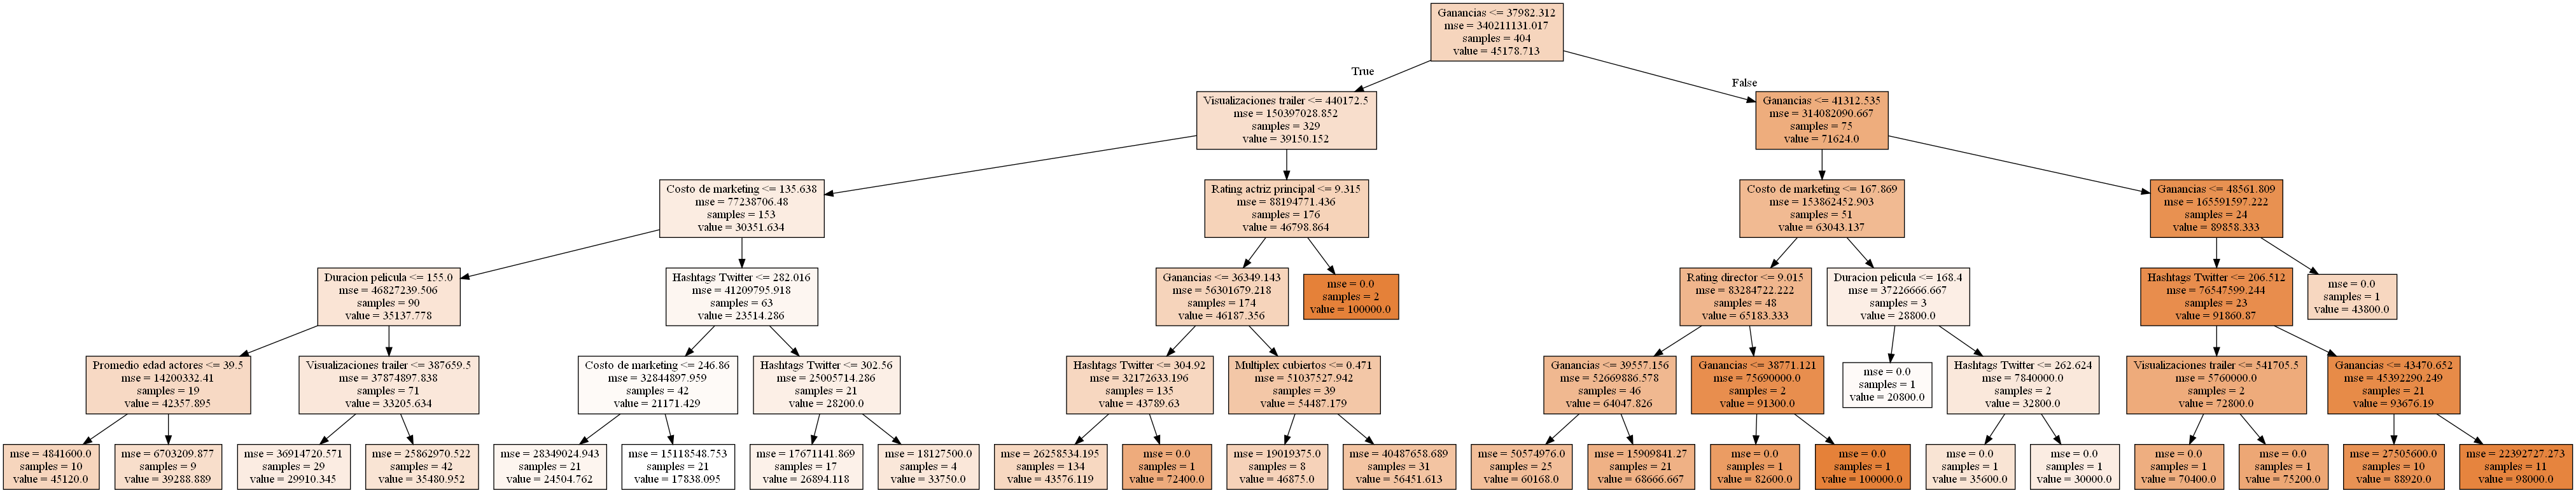

In [36]:
# Graficar el árbol con graphviz que es un software dedicado a los grafos estructurados
#!pip install graphviz
graph = pydotplus.graph_from_dot_data(datos_graf)
Image(graph.create_png())
#graph.write_png('arboloriginal.png') # Si se desea guardar el árbol

In [37]:
# Se verifica que value del nodo raíz sea igual a la media de todos los valores del atributo Coleccion
y_train.mean()

45178.71287128713

### Controlando el crecimiento del árbol

#### Por el máximo nivel de crecimiento del árbol

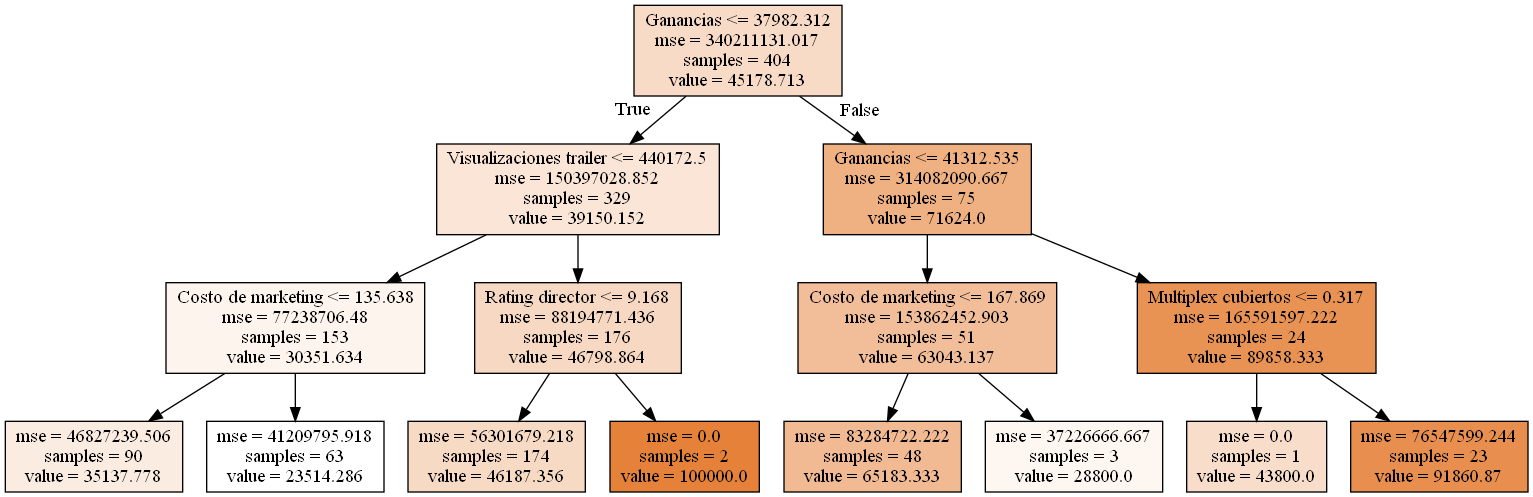

In [38]:
arbolreg1 = tree.DecisionTreeRegressor(max_depth = 3)
arbolreg1.fit(X_train, y_train)
datos_graf = tree.export_graphviz(arbolreg1, out_file = None, feature_names = X_train.columns, filled = True)
graph1 = pydotplus.graph_from_dot_data(datos_graf)
Image(graph1.create_png())

In [39]:
y_test_1 = arbolreg1.predict(X_test)

In [40]:
y_test_1

array([ 46187.35632184, 100000.        ,  46187.35632184,  23514.28571429,
        46187.35632184,  46187.35632184,  46187.35632184,  46187.35632184,
        46187.35632184,  46187.35632184,  23514.28571429,  23514.28571429,
        23514.28571429,  23514.28571429,  91860.86956522,  65183.33333333,
        46187.35632184,  65183.33333333,  46187.35632184,  46187.35632184,
        46187.35632184,  46187.35632184,  46187.35632184,  46187.35632184,
        46187.35632184, 100000.        ,  46187.35632184,  35137.77777778,
        91860.86956522,  35137.77777778,  23514.28571429,  23514.28571429,
        46187.35632184,  46187.35632184,  46187.35632184,  35137.77777778,
        23514.28571429, 100000.        ,  23514.28571429,  23514.28571429,
        46187.35632184,  46187.35632184,  46187.35632184,  23514.28571429,
        46187.35632184,  46187.35632184,  35137.77777778,  35137.77777778,
        35137.77777778,  46187.35632184,  35137.77777778,  35137.77777778,
        46187.35632184,  

#### Por el número mínimo de observaciones

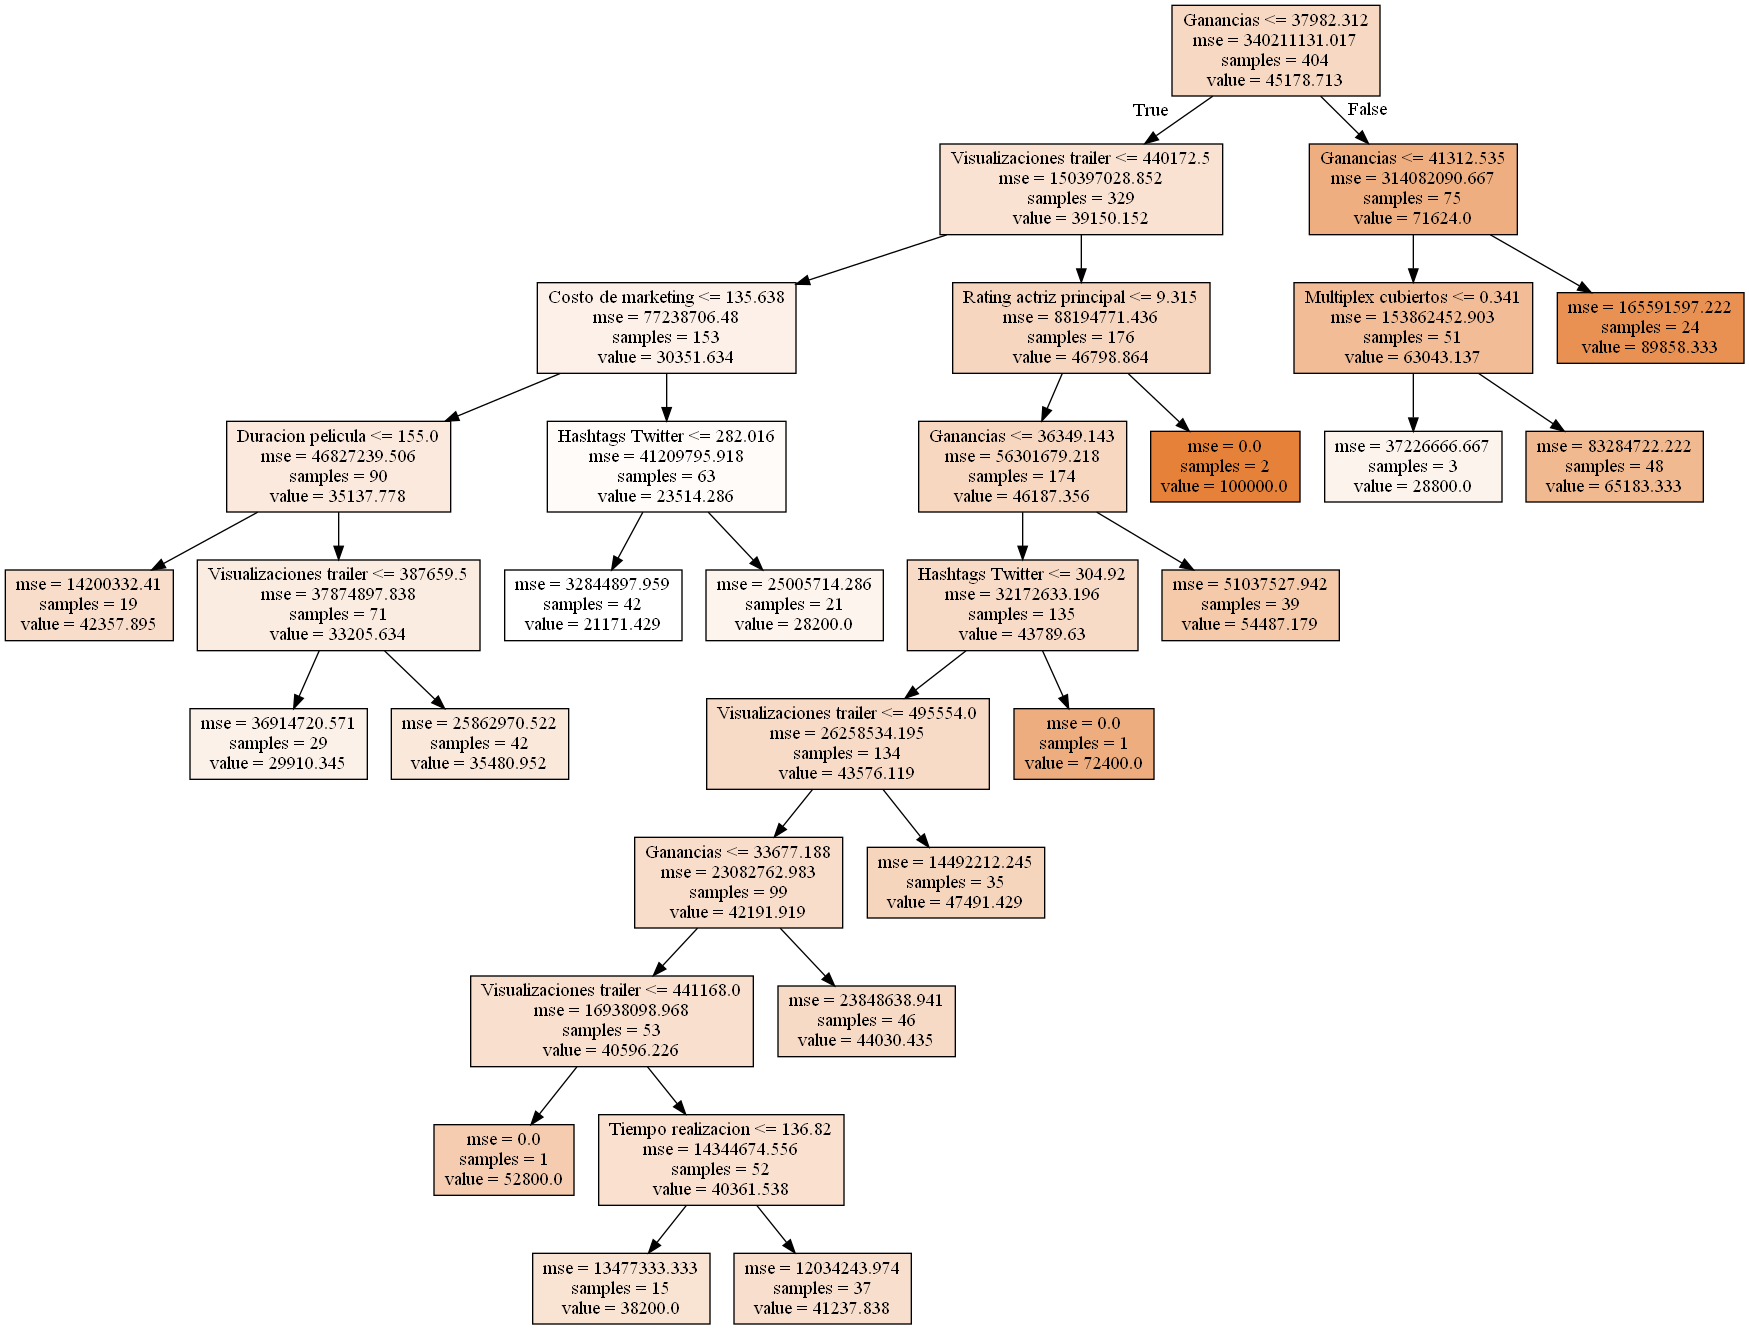

In [41]:
arbolreg2 = tree.DecisionTreeRegressor(min_samples_split = 50)
arbolreg2.fit(X_train, y_train)
datos_graf = tree.export_graphviz(arbolreg2, out_file = None, feature_names = X_train.columns, filled = True)
graph2 = pydotplus.graph_from_dot_data(datos_graf)
Image(graph2.create_png())

In [42]:
y_test_2 = arbolreg2.predict(X_test)

In [43]:
y_test_2

array([ 44030.43478261, 100000.        ,  44030.43478261,  28200.        ,
        44030.43478261,  47491.42857143,  41237.83783784,  38200.        ,
        41237.83783784,  44030.43478261,  21171.42857143,  28200.        ,
        28200.        ,  28200.        ,  89858.33333333,  65183.33333333,
        44030.43478261,  65183.33333333,  54487.17948718,  41237.83783784,
        47491.42857143,  41237.83783784,  44030.43478261,  47491.42857143,
        41237.83783784,  41237.83783784,  41237.83783784,  35480.95238095,
        89858.33333333,  35480.95238095,  28200.        ,  28200.        ,
        44030.43478261,  44030.43478261,  44030.43478261,  35480.95238095,
        21171.42857143, 100000.        ,  21171.42857143,  21171.42857143,
        44030.43478261,  41237.83783784,  44030.43478261,  21171.42857143,
        44030.43478261,  44030.43478261,  42357.89473684,  35480.95238095,
        29910.34482759,  54487.17948718,  35480.95238095,  42357.89473684,
        41237.83783784,  

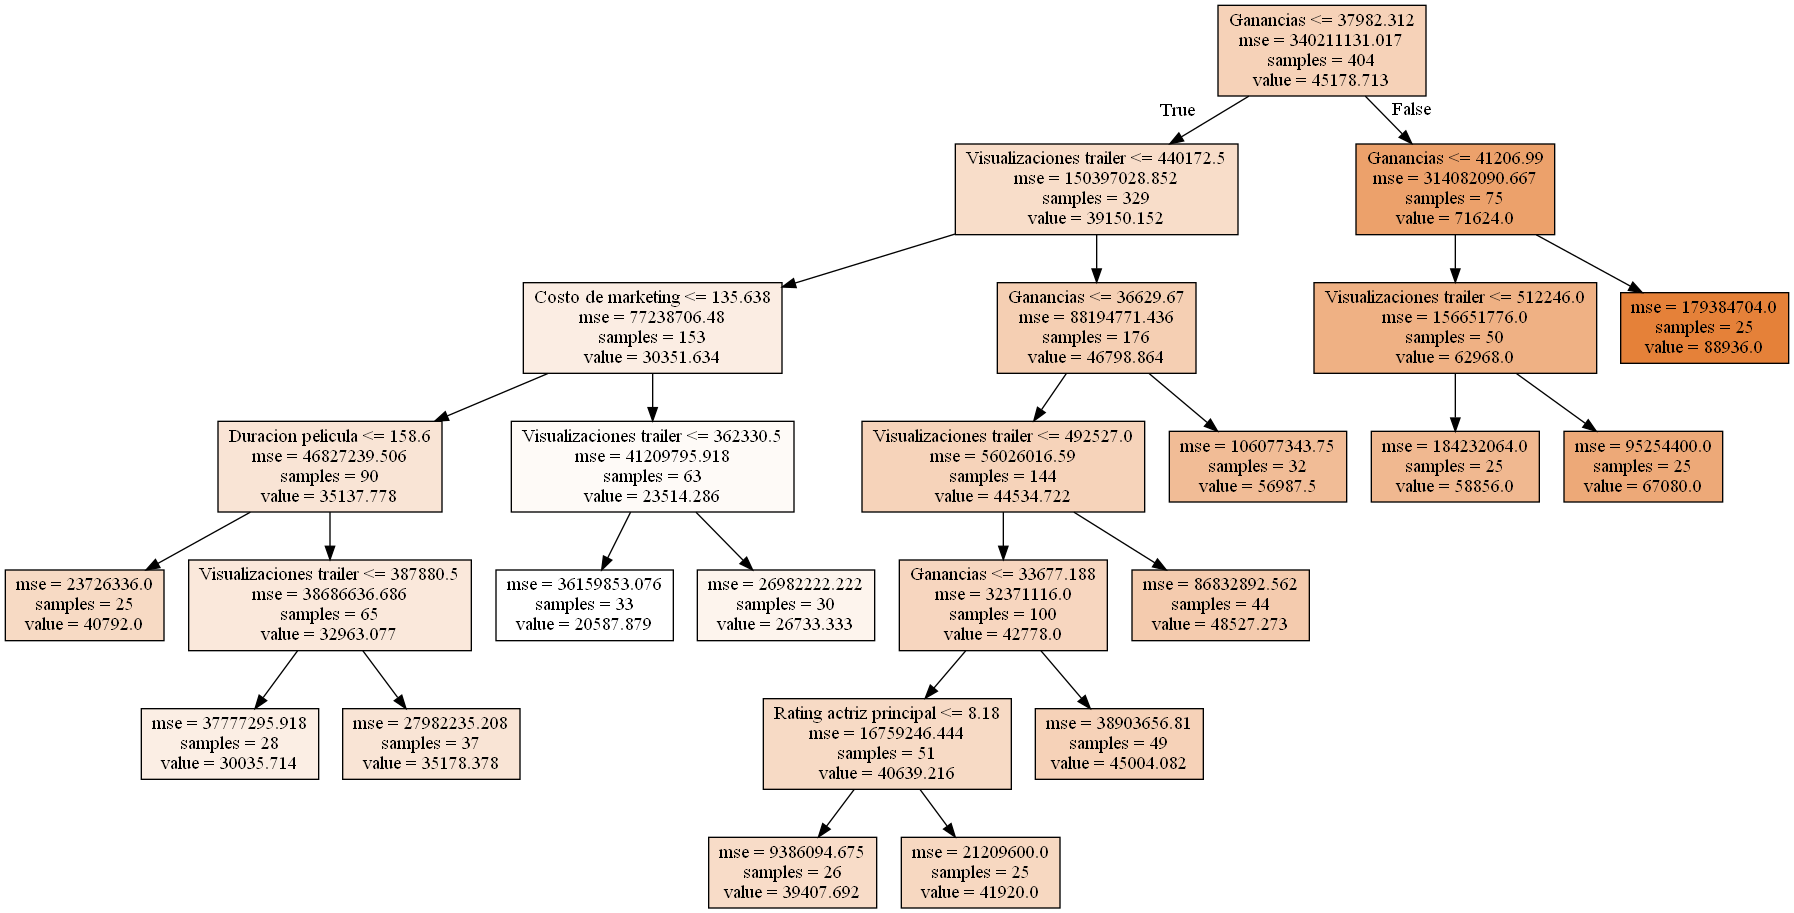

In [44]:
arbolreg3 = tree.DecisionTreeRegressor(min_samples_leaf = 25)
arbolreg3.fit(X_train, y_train)
datos_graf = tree.export_graphviz(arbolreg3, out_file = None, feature_names = X_train.columns, filled = True)
graph3 = pydotplus.graph_from_dot_data(datos_graf)
Image(graph3.create_png())

In [45]:
y_test_3 = arbolreg3.predict(X_test)

In [46]:
y_test_3

array([45004.08163265, 45004.08163265, 45004.08163265, 26733.33333333,
       45004.08163265, 48527.27272727, 41920.        , 39407.69230769,
       41920.        , 45004.08163265, 26733.33333333, 20587.87878788,
       26733.33333333, 20587.87878788, 88936.        , 67080.        ,
       45004.08163265, 67080.        , 48527.27272727, 39407.69230769,
       48527.27272727, 41920.        , 45004.08163265, 48527.27272727,
       39407.69230769, 41920.        , 39407.69230769, 35178.37837838,
       88936.        , 35178.37837838, 26733.33333333, 26733.33333333,
       45004.08163265, 45004.08163265, 45004.08163265, 35178.37837838,
       20587.87878788, 41920.        , 26733.33333333, 20587.87878788,
       45004.08163265, 39407.69230769, 45004.08163265, 26733.33333333,
       48527.27272727, 48527.27272727, 40792.        , 35178.37837838,
       30035.71428571, 56987.5       , 40792.        , 40792.        ,
       41920.        , 88936.        , 35178.37837838, 40792.        ,
      

In [47]:
arbolreg4 = tree.DecisionTreeRegressor()
arbolreg4.fit(X_train, y_train)
datos_graf = tree.export_graphviz(arbolreg4, out_file = None, feature_names = X_train.columns, filled = True)
graph4 = pydotplus.graph_from_dot_data(datos_graf)
Image(graph4.create_png())

In [48]:
y_train_1 = arbolreg4.predict(X_train)

In [49]:
y_train_1

array([ 53400.,  43400.,  54000.,  45800.,  20800.,  43800.,  41200.,
        52800.,  82600.,  34400.,  44200.,  40800.,  33000.,  48800.,
        16800.,  46000.,  19400., 100000.,  61000.,  24600.,  38800.,
        42400.,  40600.,  37600.,  66800.,  37000.,  39200.,  66400.,
        26200.,  15000.,  27200.,  34800.,  16800.,  70800.,  48000.,
        26800.,  52400.,  14400.,  26200.,  49000.,  74400.,  50000.,
        48200.,  33200.,  65800.,  72400.,  22000.,  14400.,  45600.,
        57400.,  28800.,  48800.,  36200.,  45000.,  41000.,  30400.,
        34800.,  27200.,  16400.,  36400.,  70800.,  63400.,  66000.,
        44400.,  40800.,  47800.,  50000.,  25400.,  58200.,  24000.,
        35400.,  54000.,  41200.,  20400.,  35000.,  39400.,  59600.,
        41000.,  29800.,  21800.,  39000.,  45400.,  39000.,  49200.,
        50000.,  49000., 100000.,  28600.,  23600.,  62000.,  57400.,
        32400.,  87000.,  50000.,  44000.,  39800.,  44200.,  92000.,
        45800.,  404

In [50]:
y_test_4 = arbolreg4.predict(X_test)

In [51]:
y_test_4

array([ 49400., 100000.,  37000.,  26200.,  42400.,  48400.,  36400.,
        38000.,  44000.,  36400.,  14000.,  32600.,  25400.,  20800.,
        93400.,  69800.,  59200.,  63000.,  65000.,  37800.,  48400.,
        47600.,  59200.,  48400.,  43400.,  45400.,  40400.,  43800.,
       100000.,  35600.,  25400.,  29800.,  39200.,  42400.,  36000.,
        39800.,  14400., 100000.,  28400.,  25000.,  41600.,  38600.,
        40200.,  28400.,  32200.,  39200.,  39800.,  43800.,  27600.,
        53000.,  43000.,  38200.,  46400., 100000.,  30400.,  37000.,
        38000.,  33600., 100000.,  38800.,  41000.,  43200.,  69800.,
        58000.,  21600.,  58200.,  32200.,  31400.,  35600.,  38400.,
        49600.,  46200.,  44600.,  66000.,  57400.,  16600.,  97000.,
        50000.,  57400.,  38200.,  50000.,  36000.,  14400., 100000.,
        97600.,  48400.,  40200.,  14400.,  36000.,  32200.,  45000.,
        15000.,  46400.,  69800.,  44200.,  44400.,  14400.,  47400.,
        32800.,  434

In [52]:
# Proporción de la varianza total explicada por el modelo
r2_score(y_train, y_train_1)

1.0

In [53]:
r2_score(y_test, y_test_4)

0.6245364036660657